1\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn!):

* Fill a numpy array, x,  of len(N) (with N=O(100)) with a variable normally distributed, with a given mean a standard deviation
* Fill an histogram in pyplot taking properly care about the aesthetic
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* for every element of x, create a gaussian with the mean corresponding the element value and std as a parameter that can be tuned. The std default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5.}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with np.sum()) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method


In [19]:
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sps
from scipy.integrate import trapezoid

0.031597558929255226


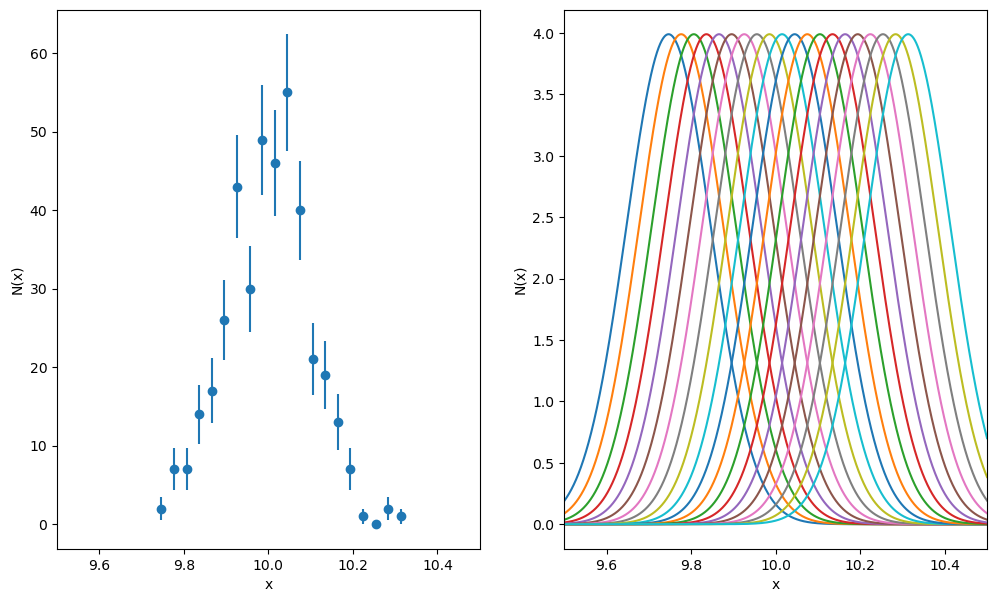

Left histogram area: 11.932759924402347
Cumuluative right area: 11.931619344051532


In [42]:
N = 400
mean = 10
std = 0.1
x = npr.normal(mean, std, N)

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 7))
ax1.set_xlim(mean-5*std, mean+5*std)
ax1.set_xlabel("x")
ax1.set_ylabel("N(x)")
#ax.hist(x, bins=int(np.sqrt(N)),histtype="step")

counts,bin_edges = np.histogram(x,int(np.sqrt(N)))
bin_centres = (bin_edges[:-1] + bin_edges[1:])/2.
err = np.sqrt(counts)
ax1.errorbar(bin_centres, counts, yerr=err, fmt='o')

STD = 1.06*x.std()*pow(len(x),-1.0/5)
print(STD)
Np = 10000
points=np.linspace(mean-5*std, mean+5*std,Np)
AllGauss = [sps.norm.pdf(points,loc=k,scale=std) for k in bin_centres]
ax2.set_xlim(mean-5*std, mean+5*std)
ax2.set_xlabel("x")
ax2.set_ylabel("N(x)")
for i in range(len(bin_centres)):
    ax2.plot(points,AllGauss[i][:])
plt.show()

OriginalArea = np.sum(counts)*(bin_edges[1]-bin_edges[0])
print(f"Left histogram area: {OriginalArea}")

# Final Gaussian as a sum of all t
BigGauss = np.sum( [ AllGauss[i][:] for i in range (len(bin_centres)) ], axis=0 )
BigGauss = OriginalArea*BigGauss/(Np*trapezoid(BigGauss, points))

print(f"Cumuluative right area: {np.sum(BigGauss)}")



2\. **Color-coded scatter plot**

Produce a scatter plot out of a dataset with two categories

* Write a function that generate a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and std (clearly it is better to have different values means..)
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below

You can try to make the procedure more general by allowing a given number $n\ge 2$ of categories

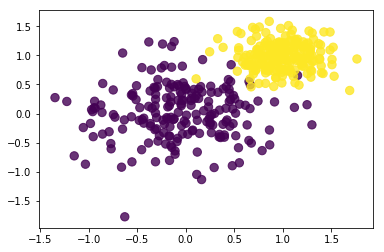

In [44]:
#! wget https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
from IPython.display import Image
Image('two_categories_scatter_plot.png')

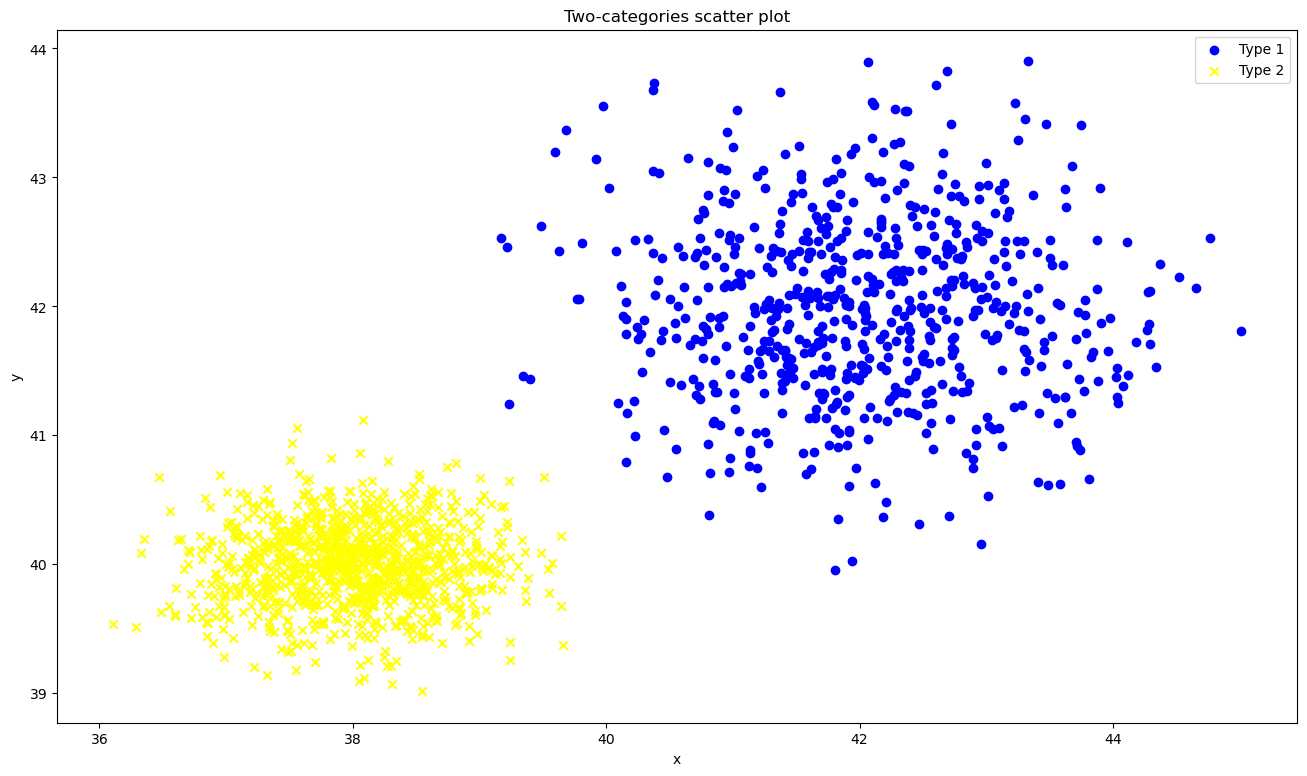

In [51]:
N1, N2 = 666, 999
mean1, mean2 = (42, 42), (38, 40)
std1, std2 = ((1.0, 0.0), (0.0, 0.5)), ((0.4, 0.0), (0.0, 0.1))
l1 = np.arange(N1)
l2 = np.arange(N1, (N2+N1))
# multidim gaussian variables
data1 = npr.multivariate_normal(mean1, std1, (N1))
data2 = npr.multivariate_normal(mean2, std2, (N2))
# dataframes of 2d data
df1 = pd.DataFrame( data1, index= l1, columns=["x", "y"])
df1["Type"] = 1
df2 = pd.DataFrame(data2, index=l2, columns=["x", "y"])
df2["Type"] = 2
df = pd.concat([df1, df2])

# making scatter plot
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16,9))
ax.scatter( x= df[df["Type"]==1]["x"], y=df[df['Type']==1]["y"], c='blue', label="Type 1", marker='o')
ax.scatter( x= df[df['Type']==2]["x"], y=df[df['Type']==2]["y"], c="yellow", label="Type 2", marker='x')
ax.set_title("Two-categories scatter plot")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.legend()
plt.show()

3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following dataset and load it as a pandas dataframe:
```bash
wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
```
Note that you should use the `np.load()` function to load the file as a numpy array, call the `.item()` method, and then pass it to the `pd.DataFrame()` constructor.
* Inspect the dataset, you'll find two variables (features)
* Clean the sample by selecting the entries (rows) with the variable "residual" in absolute value smaller than 2
* perform a linear regression of "residuals" versus "distances" using `scipy.stats.linregress()` 
* plot a seaborn jointplot of  "residuals" versus "distances", having seaborn performing a linear regression. The result of the regression should be displayed on the plot
* Fill 3 numpy arrays
  * x, serving as an array of bin centers for the "distance" variable. It should range from 0 to 20 with reasonable number of steps (bins)
  * y, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * erry, the standard deviation of the  of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

In [53]:
#!wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy

In [54]:
import seaborn as sns

LinregressResult(slope=0.0032597701220305835, intercept=-0.15432816763069473, rvalue=0.043403510522559086, pvalue=8.717037183576464e-06, stderr=0.0007327014008445789, intercept_stderr=0.008458951961471835)


Text(0, 0.5, 'residuals')

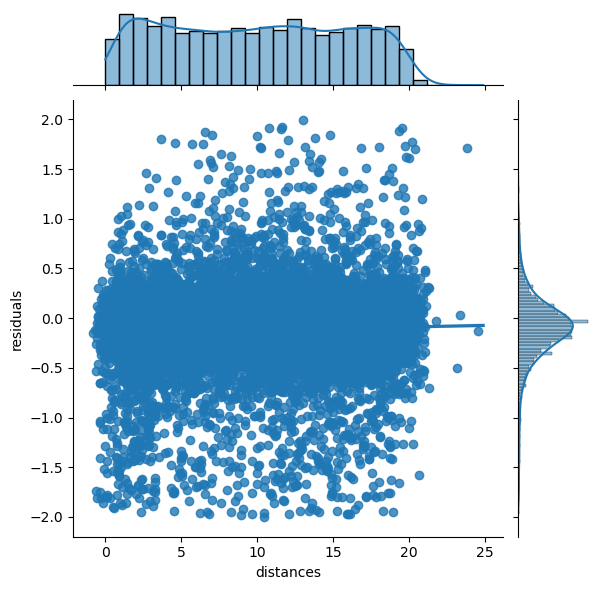

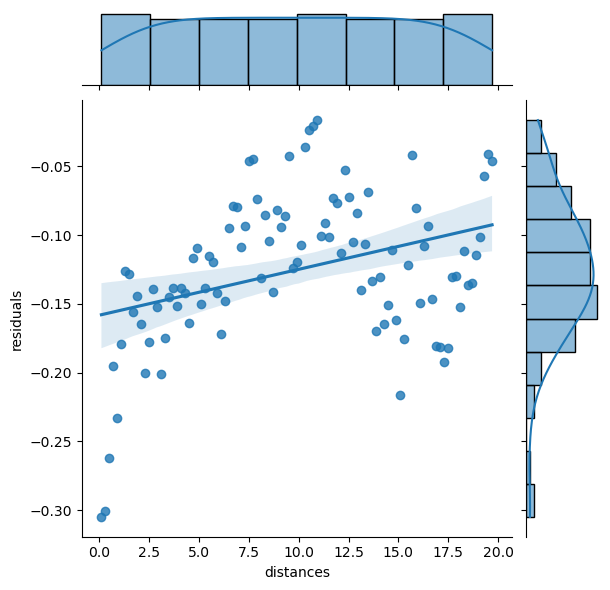

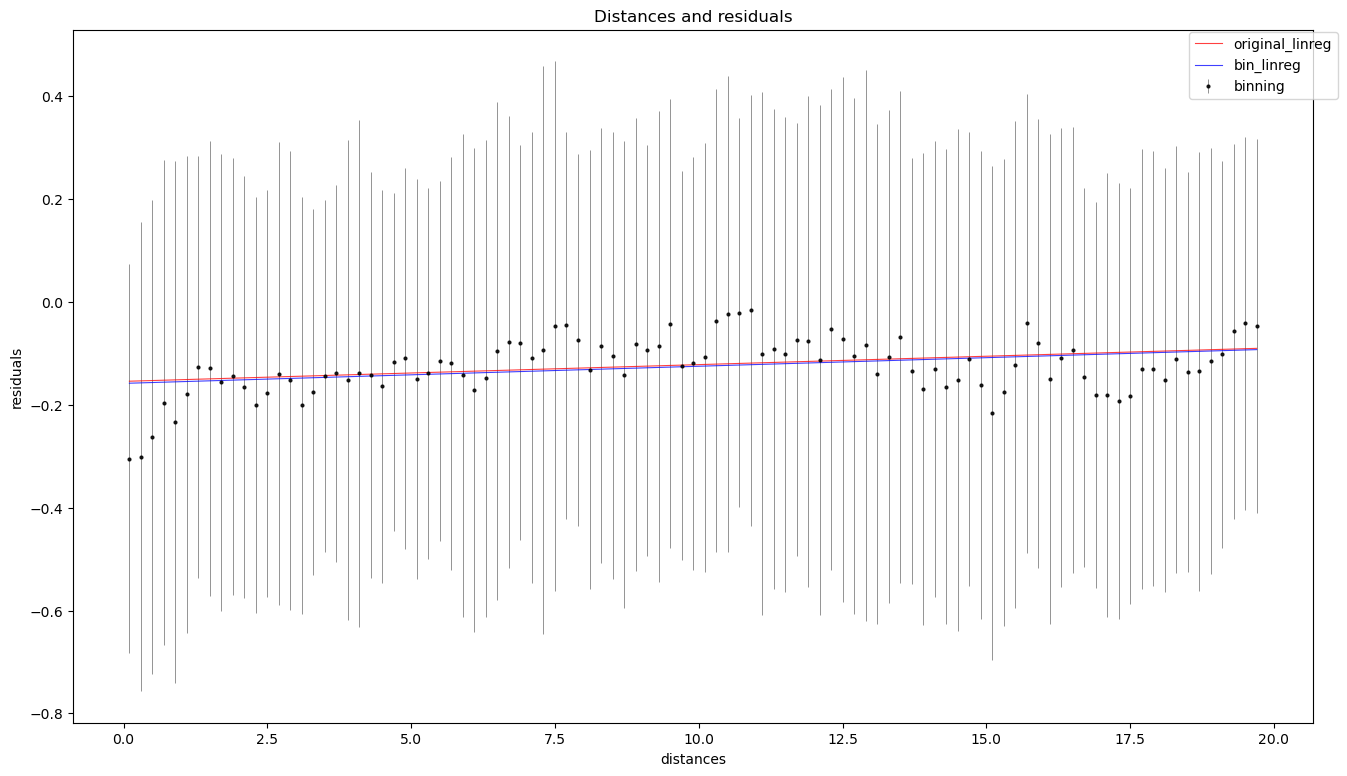

In [56]:
#temp Leo
df_261 = pd.DataFrame(np.load('residuals_261.npy', allow_pickle=True).item())
cleared = df_261[np.abs(df_261['residuals']) < 2]
#cleared
parameters = sps.linregress(cleared['distances'], cleared['residuals'])
print(parameters)
sns.jointplot(x="distances", y="residuals", x_jitter= 1.0, data=cleared, kind='reg')

# last two points
min_b= 0.0
max_b= 20.0
n_bin = 100
b_width = (max_b -min_b)/(n_bin)
x = np.arange(min_b, max_b, b_width) 
x_centroid = x[0:-1:] + b_width/2.0
y = np.array([ np.mean( cleared[(cleared['distances'] > (x[i] - b_width)) * (cleared['distances'] < (x[i] + b_width))]['residuals'] ) for i in range(n_bin-1) ])
erry = np.array([ np.std( cleared[(cleared['distances'] > (x[i] - b_width)) * (cleared['distances'] < (x[i] + b_width))]['residuals'] ) for i in range(n_bin-1) ])
x_bins = np.array([ ( cleared[(cleared['distances'] > (x[i] - b_width)) * (cleared['distances'] < (x[i] + b_width))]['distances'] ).shape[0] for i in range(n_bin-1) ])
if ( not np.all(x_bins) ) : print( 'There are empty bins')

# profile plot of the scatter plot (?)
plot_data= pd.DataFrame(zip(x_centroid, y, erry), columns=['distances','residuals','std'], index=np.arange(1, n_bin))
# g = sns.jointplot( data=plot_data , x='distances', y='residuals', weights='std', kind="reg")
g = sns.jointplot( data=plot_data , x='distances', y='residuals', kind="reg")
fig, ax1= plt.subplots(nrows=1, ncols=1, figsize=(16,9))
ax1.errorbar( x_centroid, y, erry, label='binning', alpha=0.85, color='black', ecolor='gray', elinewidth=0.7, fmt='o', markersize=2.)
# linreg line
ax1.plot( x_centroid, (x_centroid*(parameters.slope) + (parameters.intercept)), label= 'original_linreg', alpha=0.75, color='red', linewidth=0.8)
par = sps.linregress(x_centroid, y)
ax1.plot( x_centroid, (x_centroid*(par.slope) + (par.intercept)), label= 'bin_linreg', alpha=0.75, color='blue', linewidth=0.8)

# labels and co.
ax1.set_title('Distances and residuals')
ax1.legend(loc=(0.9, 0.9))
ax1.set_xlabel('distances')
ax1.set_ylabel('residuals')